# IMPORTING LIBS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOADING DATA

In [3]:
url='https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv'
data=pd.read_csv(url)
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
data.shape

(571, 43)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
data.isnull().sum() # finding a null value count

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
 # Filling missing values with most common value appearing in the dataset
df = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [8]:
#Dropping seat.no. column as it has no role in dataset and model 
df.drop(columns=['Seat No.'],inplace=True)

In [9]:
# few headers have inconsistent naming we rename them to ease access later and for the sake of convention of course codes
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [10]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

**Removing records with inconsistent grades
Note: These grades are consistent to be fair, they have a meaning but for simplicity I removed them ; generally we should'nt since they hold a meaning and have their own weight in prediction of target.**

In [11]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
# confirms the removal of WU and W graded records
for column in df.columns.values.tolist():
    print(column)
    print (df[column].isin(['WU','W']).value_counts())
    print("")

PH-121
False    547
Name: PH-121, dtype: int64

HS-101
False    547
Name: HS-101, dtype: int64

CY-105
False    547
Name: CY-105, dtype: int64

HS-105
False    547
Name: HS-105, dtype: int64

MT-111
False    547
Name: MT-111, dtype: int64

CS-105
False    547
Name: CS-105, dtype: int64

CS-106
False    547
Name: CS-106, dtype: int64

EL-102
False    547
Name: EL-102, dtype: int64

EE-119
False    547
Name: EE-119, dtype: int64

ME-107
False    547
Name: ME-107, dtype: int64

CS-107
False    547
Name: CS-107, dtype: int64

HS-205
False    547
Name: HS-205, dtype: int64

MT-222
False    547
Name: MT-222, dtype: int64

EE-222
False    547
Name: EE-222, dtype: int64

MT-224
False    547
Name: MT-224, dtype: int64

CS-210
False    547
Name: CS-210, dtype: int64

CS-211
False    547
Name: CS-211, dtype: int64

CS-203
False    547
Name: CS-203, dtype: int64

CS-214
False    547
Name: CS-214, dtype: int64

EE-217
False    547
Name: EE-217, dtype: int64

CS-212
False    547
Name: CS-212, dtype:

In [14]:
# For convenience and modeling , converting categorical values into numerical order
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [15]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [16]:
df.isnull().sum() # no null value

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [17]:
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

In [19]:
df.corr() #checking for coorelation between features

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.379618,0.614248,0.524738,0.446766,0.636212,0.281816,0.398753,0.643970,0.531362,...,0.020292,0.489215,0.367207,0.338734,0.296364,0.147294,0.474972,0.093352,0.278926,0.645401
HS-101,0.379618,1.000000,0.347801,0.501138,0.426526,0.416711,0.375925,0.359004,0.294395,0.338832,...,0.223122,0.401861,0.259491,0.329804,0.304736,0.243382,0.278332,0.248648,0.247541,0.556404
CY-105,0.614248,0.347801,1.000000,0.558376,0.535582,0.596149,0.374883,0.437063,0.541064,0.447586,...,0.268102,0.506767,0.540412,0.401831,0.169889,0.058096,0.500556,0.139180,0.081867,0.669354
HS-105,0.524738,0.501138,0.558376,1.000000,0.504060,0.511228,0.516201,0.353445,0.441802,0.355738,...,0.317844,0.532839,0.543082,0.476441,0.223110,0.130633,0.521508,0.264851,0.184608,0.660944
MT-111,0.446766,0.426526,0.535582,0.504060,1.000000,0.379697,0.539832,0.555459,0.422013,0.463967,...,0.526893,0.595719,0.468253,0.567281,0.300848,0.211713,0.544146,0.430495,0.294732,0.738479
CS-105,0.636212,0.416711,0.596149,0.511228,0.379697,1.000000,0.280244,0.318105,0.560943,0.438493,...,0.050869,0.399045,0.306536,0.269404,0.259359,0.125780,0.350886,0.054895,0.212259,0.588444
CS-106,0.281816,0.375925,0.374883,0.516201,0.539832,0.280244,1.000000,0.326104,0.279246,0.312114,...,0.543480,0.443215,0.512830,0.455443,0.148628,0.098559,0.486163,0.383922,0.162366,0.597217
EL-102,0.398753,0.359004,0.437063,0.353445,0.555459,0.318105,0.326104,1.000000,0.446386,0.461441,...,0.354018,0.496796,0.340850,0.404358,0.310105,0.321876,0.392478,0.409486,0.325025,0.651206
EE-119,0.643970,0.294395,0.541064,0.441802,0.422013,0.560943,0.279246,0.446386,1.000000,0.580310,...,0.165602,0.488244,0.393930,0.409087,0.303402,0.219323,0.504711,0.244686,0.338944,0.647128
ME-107,0.531362,0.338832,0.447586,0.355738,0.463967,0.438493,0.312114,0.461441,0.580310,1.000000,...,0.240458,0.487842,0.380422,0.423390,0.341935,0.161884,0.494603,0.245402,0.294174,0.659035


<AxesSubplot:>

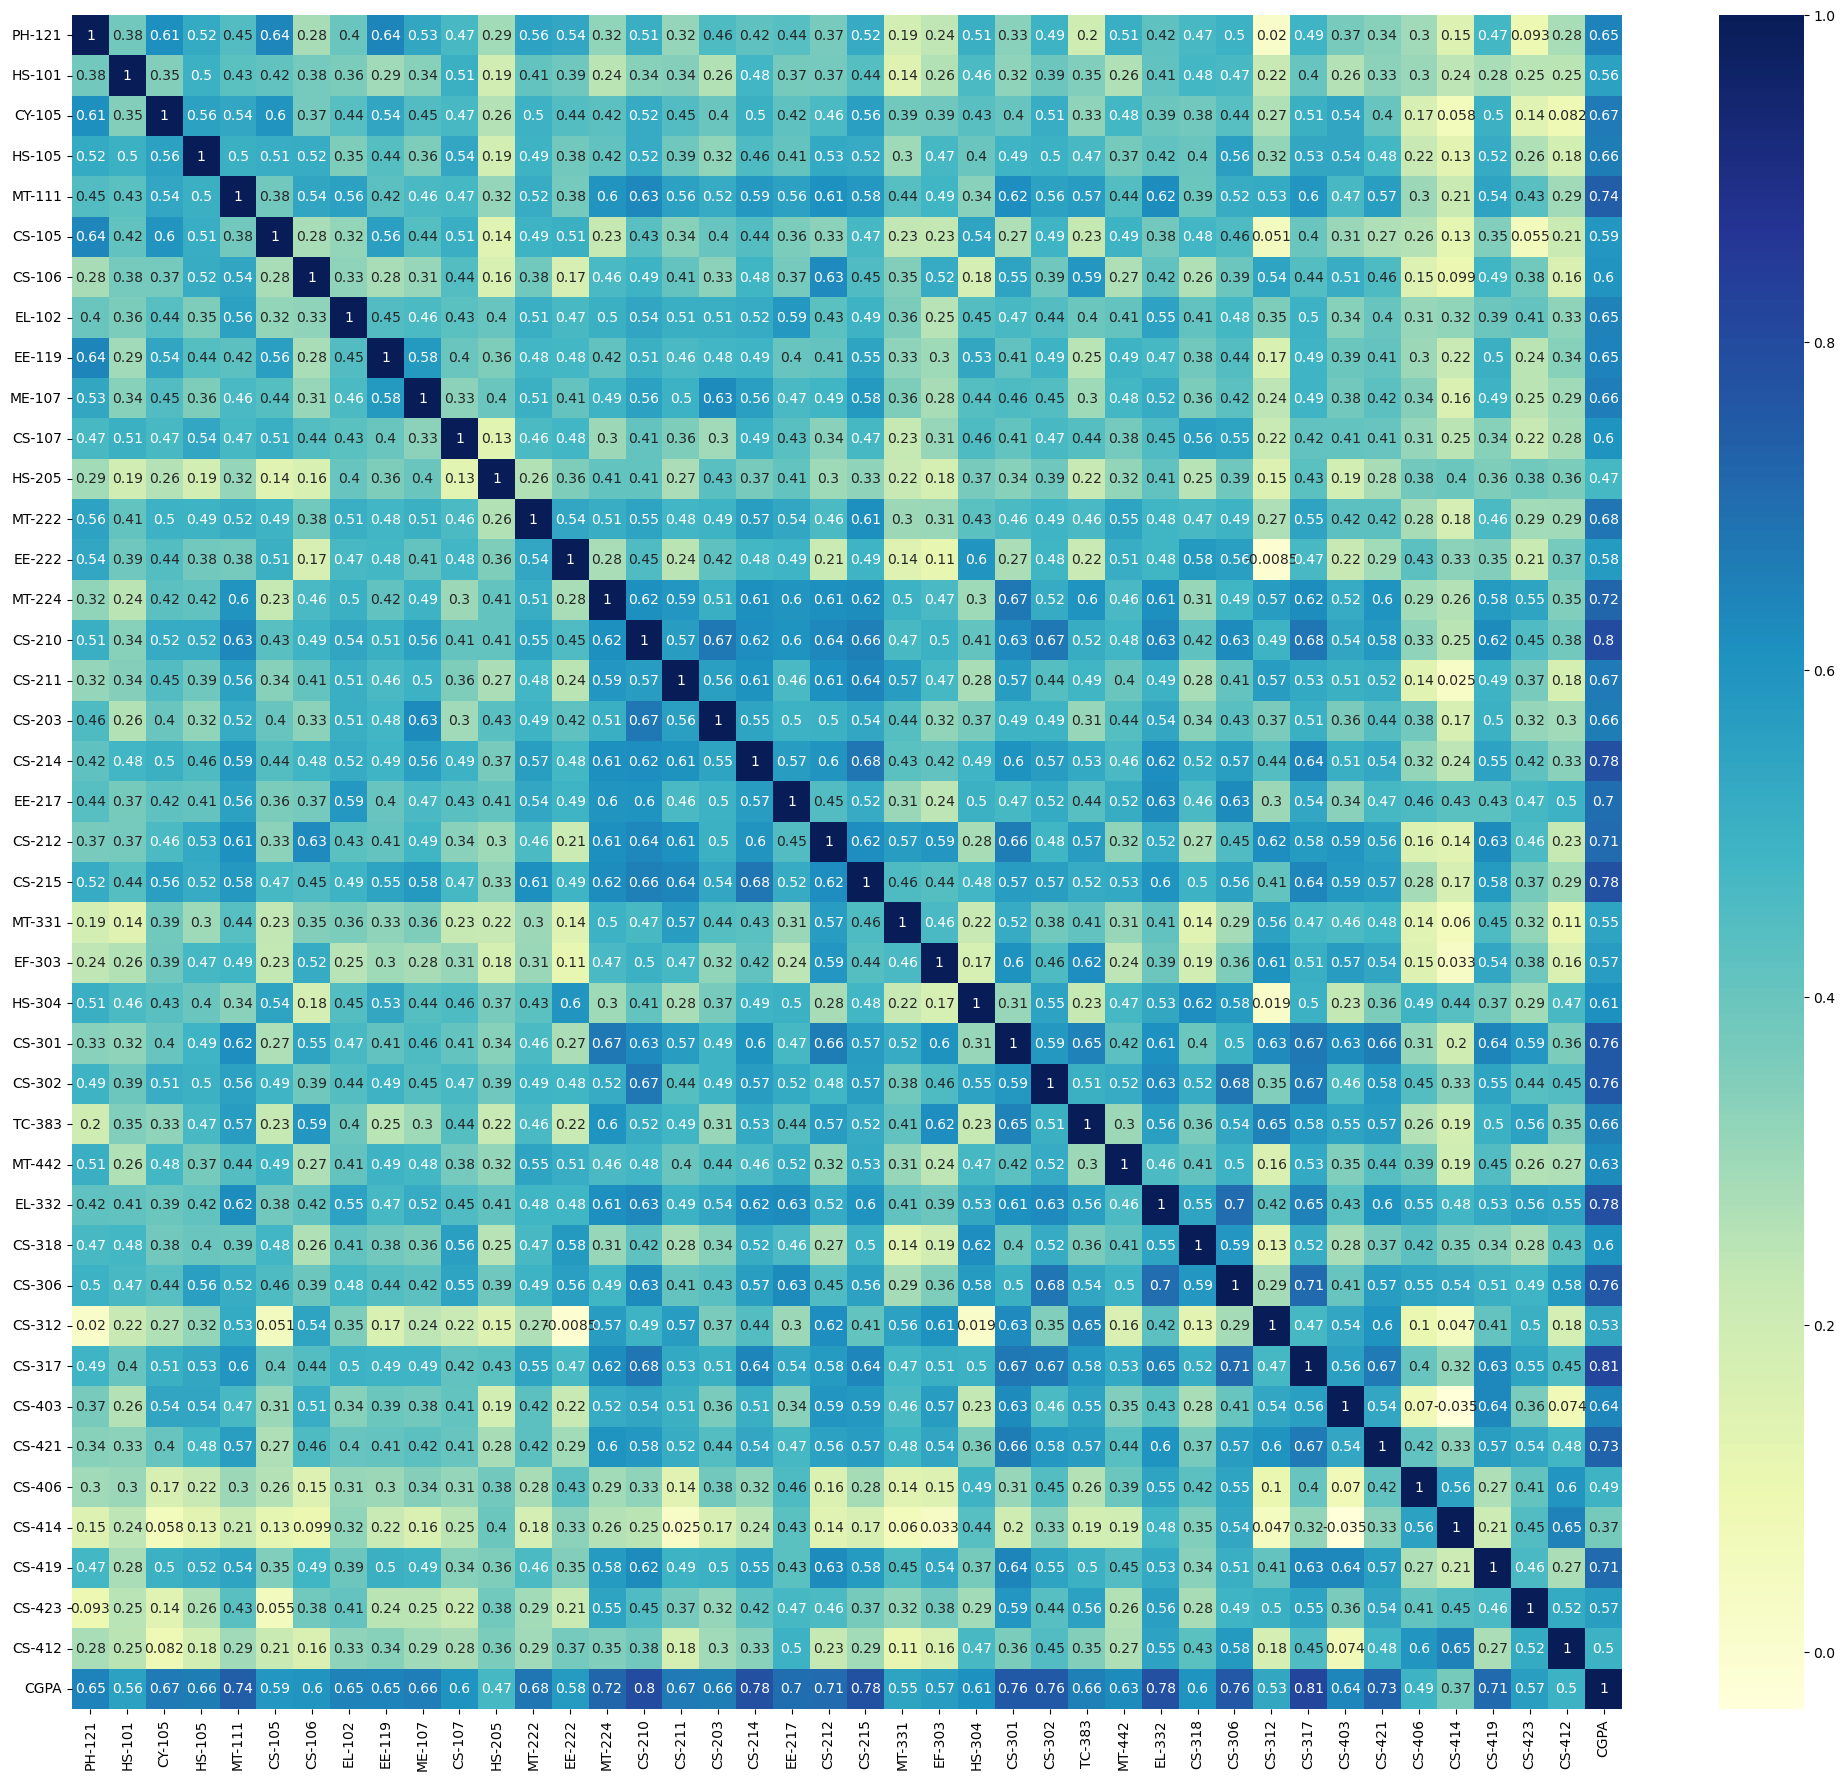

In [20]:
plt.figure(figsize=[25,22])
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

In [ ]:
plt.figure(figsize=[50,35])
sns.pairplot(df)

In [ ]:
# Clearly can be seen that dataset has outliers
plt.figure(figsize=[15,12])
sns.boxplot(data=df)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()